<a href="https://colab.research.google.com/github/Aarthi-Nunna/Netflix-Recommendation-System/blob/main/Team_11_Netflix_TvShow_and_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [ ]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('netflix_titles.csv')

In [ ]:
# printing the first 5 rows of the dataframe
movies_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# number of rows and columns in the data frame
movies_data.shape

(8807, 12)

In [ ]:
#DATA ANALYSIS 

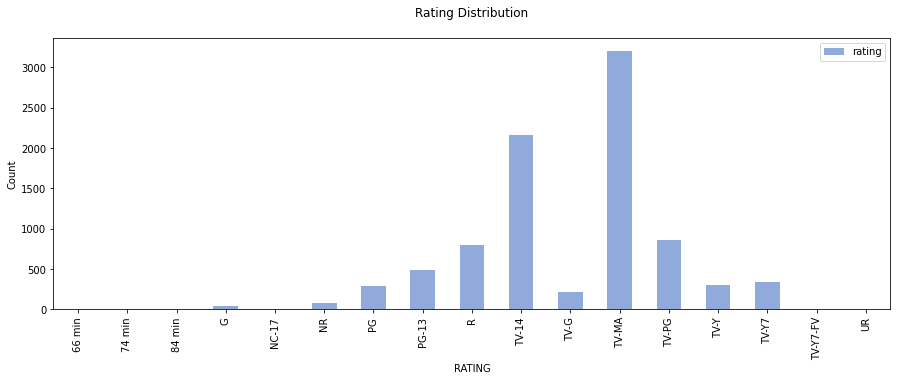

In [ ]:
(pd.DataFrame(movies_data['rating']
              .value_counts(sort=False))
              .sort_index()
              .plot(kind='bar', color='#4472C4', figsize=(15,5), alpha=0.6))
plt.title('Rating Distribution\n')
plt.xlabel('RATING')
plt.ylabel('Count')
plt.show()

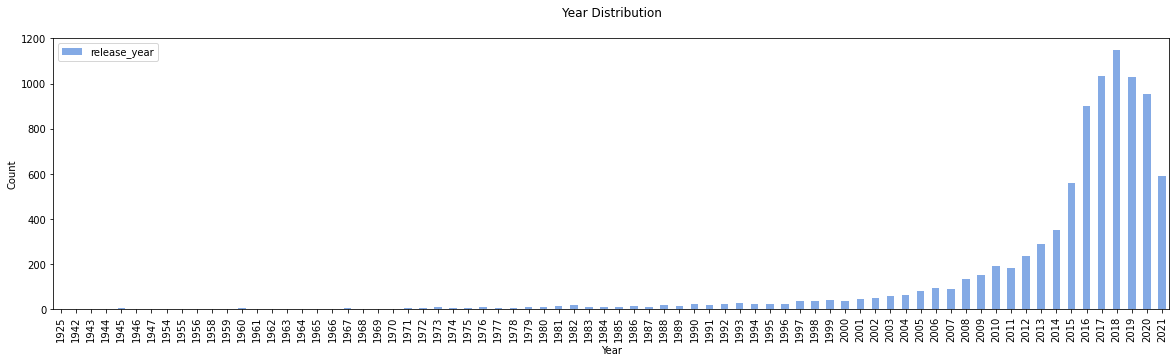

In [ ]:
(pd.DataFrame(movies_data['release_year']
              .value_counts(sort=False))
              .sort_index()
              .plot(kind='bar', color='#3272D4', figsize=(20,5), alpha=0.6))
plt.title('Year Distribution\n')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

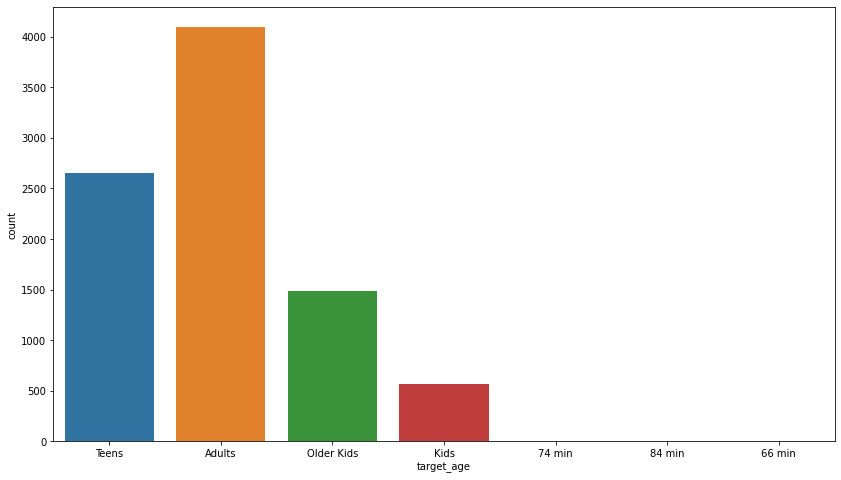

In [ ]:
ratings_age = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

movies_data['target_age'] = movies_data['rating'].replace(ratings_age)
plt.figure(figsize = (14,8))
sns.countplot(x='target_age',data = movies_data)

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

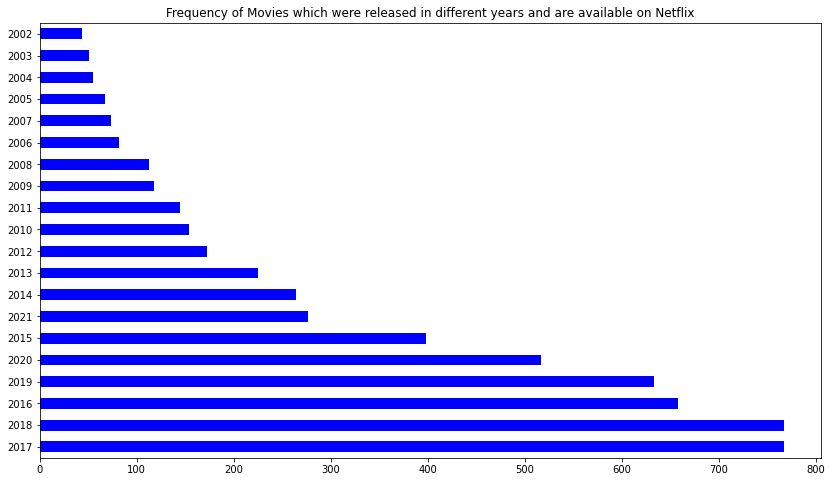

In [ ]:
plt.figure(figsize=(14,8))
movies_data[movies_data["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="barh",color="Blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

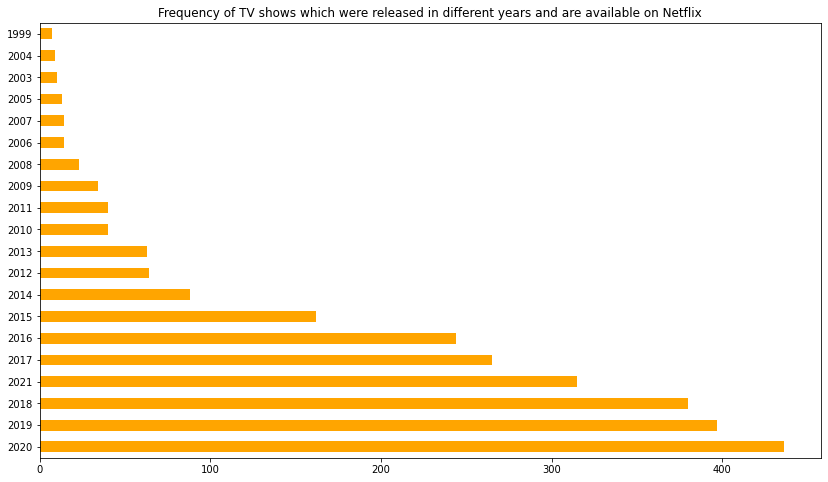

In [ ]:
plt.figure(figsize=(14,8))
movies_data[movies_data["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="barh",color="Orange")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

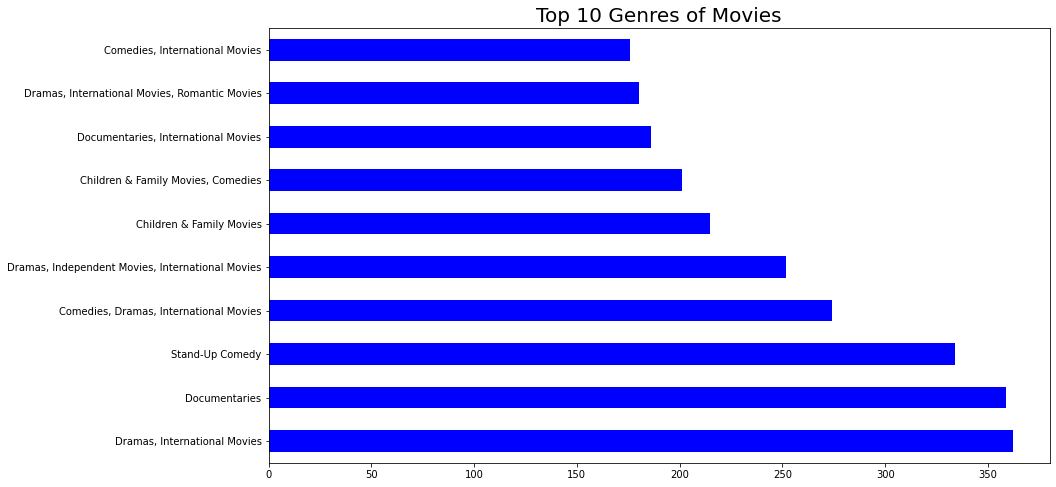

In [ ]:
plt.figure(figsize=(14,8))
movies_data[movies_data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Blue")
plt.title("Top 10 Genres of Movies",size=20)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

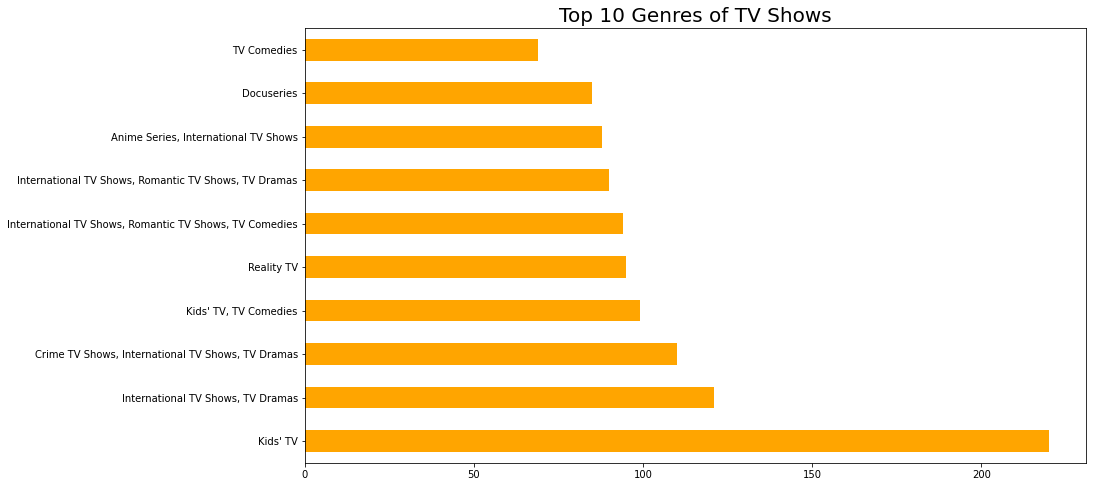

In [ ]:
plt.figure(figsize=(14,8))
movies_data[movies_data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Orange")
plt.title("Top 10 Genres of TV Shows",size=20)

In [ ]:
# selecting the relevant features for recommendation
selected_features = ['type','country','title','listed_in','cast','director','description']
print(selected_features)

['type', 'country', 'title', 'listed_in', 'cast', 'director', 'description']


In [ ]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = movies_data['type']+' '+movies_data['country']+' '+movies_data['title']+' '+movies_data['listed_in']+' '+movies_data['director']

In [ ]:
print(combined_features)


0       Movie United States Dick Johnson Is Dead Docum...
1       TV Show South Africa Blood & Water Internation...
2       TV Show  Ganglands Crime TV Shows, Internation...
3       TV Show  Jailbirds New Orleans Docuseries, Rea...
4       TV Show India Kota Factory International TV Sh...
                              ...                        
8802    Movie United States Zodiac Cult Movies, Dramas...
8803    TV Show  Zombie Dumb Kids' TV, Korean TV Shows...
8804    Movie United States Zombieland Comedies, Horro...
8805    Movie United States Zoom Children & Family Mov...
8806    Movie India Zubaan Dramas, International Movie...
Length: 8807, dtype: object


In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)
feature_vectors.shape

(8807, 14587)

Cosine Similarity

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
sdf=pd.DataFrame(similarity)
sdf.head(45)

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003697,0.020982,0.006717,0.024243,...,0.018742,0.004430,0.005418,0.000000,0.010830,0.026103,0.000000,0.024047,0.025268,0.005350
1,0.000000,1.000000,0.304986,0.158571,0.344028,0.350487,0.000000,0.016602,0.207320,0.014766,...,0.225698,0.021431,0.026212,0.318111,0.020036,0.015898,0.313446,0.000000,0.000000,0.025882
2,0.000000,0.304986,1.000000,0.138585,0.341798,0.216481,0.000000,0.006291,0.197648,0.000000,...,0.136394,0.008121,0.009933,0.303487,0.007592,0.000000,0.294761,0.000000,0.000000,0.009808
3,0.000000,0.158571,0.138585,1.000000,0.156326,0.135361,0.086412,0.000000,0.170617,0.000000,...,0.089485,0.000000,0.000000,0.138804,0.000000,0.000000,0.158270,0.000000,0.000000,0.000000
4,0.000000,0.344028,0.341798,0.156326,1.000000,0.244193,0.000000,0.007096,0.222950,0.019996,...,0.153854,0.054407,0.046440,0.373544,0.008564,0.000000,0.352019,0.019835,0.020842,0.045855
5,0.000000,0.350487,0.216481,0.135361,0.244193,1.000000,0.000000,0.008027,0.160898,0.012604,...,0.133221,0.010362,0.012674,0.227616,0.009688,0.013571,0.247230,0.049452,0.000000,0.012515
6,0.003697,0.000000,0.000000,0.086412,0.000000,0.000000,1.000000,0.012074,0.000000,0.004729,...,0.000000,0.009737,0.011909,0.000000,0.009103,0.012752,0.000000,0.011748,0.080896,0.011759
7,0.020982,0.016602,0.006291,0.000000,0.007096,0.008027,0.012074,1.000000,0.031788,0.036456,...,0.022319,0.028420,0.034761,0.014533,0.037471,0.053475,0.000000,0.039729,0.041746,0.034324
8,0.006717,0.207320,0.197648,0.170617,0.222950,0.160898,0.000000,0.031788,1.000000,0.025818,...,0.117941,0.000000,0.000000,0.197960,0.006605,0.009252,0.206926,0.008524,0.008957,0.000000
9,0.024243,0.014766,0.000000,0.000000,0.019996,0.012604,0.004729,0.036456,0.025818,1.000000,...,0.023977,0.035121,0.022108,0.012925,0.025457,0.049645,0.020245,0.051330,0.053937,0.021830


In [ ]:
sdf.tail()

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
8802,0.026103,0.015898,0.000000,0.00000,0.000000,0.013571,0.012752,0.053475,0.009252,0.049645,...,0.025816,0.028641,0.035032,0.013917,0.076513,1.000000,0.000000,0.044200,0.046445,0.034591
8803,0.000000,0.313446,0.294761,0.15827,0.352019,0.247230,0.000000,0.000000,0.206926,0.020245,...,0.211494,0.016644,0.000000,0.295226,0.000000,0.000000,1.000000,0.020082,0.021102,0.000000
8804,0.024047,0.000000,0.000000,0.00000,0.019835,0.049452,0.011748,0.039729,0.008524,0.051330,...,0.023783,0.030985,0.017219,0.000000,0.021650,0.044200,0.020082,1.000000,0.064224,0.017002
8805,0.025268,0.000000,0.000000,0.00000,0.020842,0.000000,0.080896,0.041746,0.008957,0.053937,...,0.024991,0.032559,0.018093,0.000000,0.022750,0.046445,0.021102,0.064224,1.000000,0.017866
8806,0.005350,0.025882,0.009808,0.00000,0.045855,0.012515,0.011759,0.034324,0.000000,0.021830,...,0.000000,0.065500,0.080115,0.022656,0.033510,0.034591,0.000000,0.017002,0.017866,1.000000


In [ ]:
print(similarity.shape)

(8807, 8807)


Getting the movie name from the user

In [ ]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Jeans


In [ ]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Dragon', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws 3', 'Jaws: The Revenge

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Jeans', 'Lens', 'Jaws']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Jeans


In [ ]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]
print(index_of_the_movie)
index = int(index_of_the_movie[1:])-1
print(index)

s25
24


In [ ]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index]))
print(similarity_score)

[(0, 0.006166359490834307), (1, 0.012934503135284754), (2, 0.011304238876661061), (3, 0.0), (4, 0.11744220868392952), (5, 0.0), (6, 0.02169565802499821), (7, 0.04367733084980803), (8, 0.0), (9, 0.03161664084856497), (10, 0.010627523245445828), (11, 0.01047664271114813), (12, 0.032496863515307964), (13, 0.04484644466491628), (14, 0.039475212499193536), (15, 0.0264386865259542), (16, 0.024686752292722033), (17, 0.0), (18, 0.008508008775890643), (19, 0.0132573623621514), (20, 0.008455726772445042), (21, 0.012265685834571481), (22, 0.06748227131636143), (23, 0.018560694773813106), (24, 1.0000000000000002), (25, 0.01324620624004423), (26, 0.06258164179697813), (27, 0.029401911697837926), (28, 0.028896471318216304), (29, 0.05249821757671569), (30, 0.042407719188272075), (31, 0.02547199490874529), (32, 0.035784463553705646), (33, 0.014282980138176886), (34, 0.0), (35, 0.03605978022454026), (36, 0.0423276154994537), (37, 0.02363805026770742), (38, 0.006922985913240545), (39, 0.0581091274336684

In [ ]:
len(similarity_score)

8807

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(24, 1.0000000000000002), (3224, 0.3774353956829054), (1853, 0.2823737593157465), (3196, 0.2221565141155386), (2334, 0.2029515349033954), (7144, 0.2013114916616152), (4187, 0.19146335451746638), (7099, 0.18832808981252272), (7837, 0.18529890980156793), (1942, 0.1850543231813322), (8170, 0.18069747817752801), (2735, 0.17962321139273424), (4577, 0.1781684015238773), (3739, 0.17698840222746312), (7224, 0.17576752389201397), (2436, 0.1740074272309584), (4736, 0.17340628423897467), (6296, 0.17301035503515574), (7053, 0.17301035503515574), (1423, 0.17175874216294448), (1944, 0.17142282748781523), (7068, 0.17135455340828198), (6666, 0.1710303501244911), (1863, 0.1706830175449055), (6907, 0.16824624124906237), (8438, 0.1672578726918505), (483, 0.167021711955189), (8098, 0.16390369230995194), (4904, 0.1636949889726214), (5461, 0.16364291308697934), (4734, 0.16341147601340217), (4693, 0.16232214919508728), (4722, 0.16194271094742768), (4562, 0.16166386435090754), (1858, 0.1616342434405402), (46

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Tayo and Little Wizards
2 . Tayo the Little Bus
3 . Iris
4 . One Spring Night
5 . Tayo the Little Bus Movie: Mission Ace
6 . Romance is a bonus book
7 . The Lies Within
8 . Law School
9 . Another Miss Oh
10 . Love (ft. Marriage and Divorce)
11 . Memories of the Alhambra
12 . Persona
13 . Mr. Sunshine
14 . A Man Called God
15 . Strangers from Hell
16 . Racket Boys
17 . Can We Get Married?
18 . The King: Eternal Monarch
19 . The Lady in Dignity
20 . Hyori's Bed & Breakfast
21 . Run On
22 . Keymon and Nani in Space Adventure
23 . Start-Up
24 . Morphle
25 . Happy And
26 . Itaewon Class
27 . MONKART
28 . Wizards: Tales of Arcadia
29 . Because This Is My First Life


Movie Recommendation Sytem

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i,title_from_index)
    i+=1

 Enter your favourite movie name : The Conjuring
Suggested for you : 

1 The Conjuring 2
2 The Conjuring
3 Between Worlds
4 Insidious
5 The Tudors
6 In the Tall Grass
7 Gnome Alone
8 The Blackcoat's Daughter
9 Safe House
10 The Theory of Everything
11 The Phantom of the Opera
12 Conjuring Spirit
13 The Binding
14 I Am the Pretty Thing That Lives in the House
15 Simon Amstell: Set Free
16 Special Correspondents
17 Once Upon a Time in London
18 Blow
19 Penelope
20 Creep
21 Young Adult
22 Hostage House
23 Scream 3
24 Suite Française
25 Big Stone Gap
26 Knightfall
27 Gehenna: Where Death Lives
28 House of the Witch
29 The Boy in the Striped Pajamas


In [ ]:
df=pd.DataFrame();
df2=pd.DataFrame();
similar=[]
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])-1

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  if (i<30):
    df = df.append(movies_data.iloc[index])
    similar.append(movie[1])
    i+=1
df2 = df.assign(similarity = similar)
df2.head(10)

 Enter your favourite movie name : Jeans
Suggested for you : 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_age,similarity
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998.0,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Teens,1.000000
3224,s3225,Movie,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,"November 27, 2019",2019.0,TV-14,134 min,"Comedies, International Movies, Romantic Movies",When caste differences throw a wrench into the...,Teens,0.377435
1853,s1854,Movie,Rooting for Roona,"Pavitra Chalam, Akshay Shankar",,India,"October 15, 2020",2020.0,TV-PG,42 min,"Documentaries, International Movies","In rural India, a child with hydrocephalus get...",Older Kids,0.282374
3196,s3197,Movie,Lakeeran,,"Harman Virk, Yuvika Chaudhry, Nirmal Rishi, Sh...",India,"December 1, 2019",2016.0,TV-PG,111 min,"Dramas, International Movies, Romantic Movies",Guilt-ridden over his involvement in a fatal c...,Older Kids,0.222157
2334,s2335,Movie,Seven (Tamil),,,India,"June 26, 2020",2019.0,TV-MA,111 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...,Adults,0.202952
7144,s7145,Movie,Judwaa,David Dhawan,"Salman Khan, Karisma Kapoor, Rambha, Kader Kha...",India,"December 31, 2019",1997.0,TV-14,133 min,"Comedies, International Movies, Romantic Movies","Separated at birth, a pair of identical twins ...",Teens,0.201311
4187,s4188,Movie,Adhugo,,,India,"January 15, 2019",2018.0,TV-14,105 min,"Comedies, Independent Movies, International Mo...",A fast-footed piglet named Bunty becomes an ob...,Teens,0.191463
7099,s7100,Movie,Ishqedarriyaan,V. K. Prakash,"Suhasini Mulay, Kavin Dave, Evelyn Sharma",India,"March 1, 2018",2015.0,TV-14,130 min,"Dramas, International Movies, Romantic Movies",A young millionaire is willing to do anything ...,Teens,0.188328
7837,s7838,Movie,Ready,Anees Bazmee,"Salman Khan, Asin, Paresh Rawal, Mahesh Manjre...",India,"October 22, 2017",2011.0,TV-PG,144 min,"Comedies, International Movies, Romantic Movies","Bollywood superstar Salman Khan plays Prem, an...",Older Kids,0.185299
1942,s1943,Movie,Ishqiya,Abhishek Chaubey,"Naseeruddin Shah, Vidya Balan, Arshad Warsi, S...",India,"September 28, 2020",2009.0,TV-14,115 min,"Comedies, International Movies, Romantic Movies",A deceitful woman seduces two of her late husb...,Teens,0.185054


In [ ]:
print(sorted_similar_movies)

[(3686, 1.0000000000000002), (8439, 0.1404521364148513), (69, 0.11742873614076263), (5366, 0.10741535004384656), (1698, 0.1025291916670167), (4400, 0.09876568429026303), (1480, 0.0981010287804683), (7648, 0.09311772220586578), (2488, 0.09129075422797824), (2583, 0.09032503077287068), (2473, 0.08347614226049392), (3592, 0.08155607901033086), (5350, 0.0810970326889124), (2793, 0.08089551551732363), (3294, 0.08036692261584817), (6066, 0.07982427589541762), (6085, 0.07972111326096556), (5806, 0.07693746146091261), (8334, 0.07642400048618744), (8431, 0.0755168967576195), (5431, 0.07453182055436998), (8132, 0.07396449868997923), (4654, 0.07371210653137901), (8726, 0.0735691437870559), (6879, 0.07234943503963143), (7878, 0.07150193111187213), (522, 0.07117171914011318), (1688, 0.0709520386233521), (4109, 0.0708653718247108), (3175, 0.07083887516974971), (5744, 0.07034721869743032), (5069, 0.06953764162672686), (6253, 0.06919342648053216), (1224, 0.0690411608953071), (2883, 0.0689934319676954)

In [ ]:
missing_percentage = movies_data.isnull().sum()/movies_data.shape[0]*100

In [ ]:
missing_percentage.to_list()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.11354604292040424,
 0.0,
 0.04541841716816169,
 0.034063812876121265,
 0.0,
 0.0,
 0.04541841716816169]

In [ ]:
clms = movies_data.columns.to_list()
missing_percentage = missing_percentage.to_list()

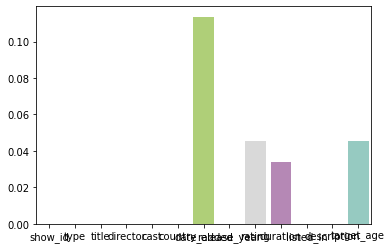

In [ ]:
plt.bar(clms, missing_percentage, color='red', alpha=0.5)
ax = sns.barplot(x=clms, y= missing_percentage,palette="Set3")

In [ ]:
#table with recommendations
import random 
rand = random.sample(range(0,8000), 10)
mov_dict=dict()
name=[]
recos=[]
for mov in rand:
  movie_name=movies_data.iloc[mov,2]
  name.append(movie_name)
  find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
  close_match = find_close_match[0]
  index = mov
  similarity_score = list(enumerate(similarity[index]))
  sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
  rec=[]
  i=1
  for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if(i<10):
      rec.append(title_from_index)
      i=i+1
  recos.append(rec[1:])
  i=0
data={'Original':name,
      'Recommended':recos}
df = pd.DataFrame(data)
df

,Original,Recommended
0,Burning Cane,"[Surviving R. Kelly, Surviving R. Kelly: The I..."
1,Dawn of the Croods,"[The Adventures of Puss in Boots, Lego DC Comi..."
2,Dean,"[Demetri Martin: The Overthinker, Demetri Mart..."
3,Santa's Apprentice,"[Magic Snowflake, Get Santa, Bob's Broken Slei..."
4,Clear and Present Danger,"[Patriot Games, The Art of War, Best of the Be..."
5,First Impression,"[Blood Brothers: Malcolm X & Muhammad Ali, You..."
6,My Girl 2,"[My Girl, What a Girl Wants, Christmas with th..."
7,Post Mortem: No One Dies in Skarnes,"[Somewhere Between, Carmel: Who Killed Maria M..."
8,Show Me the Money,"[Kopitiam, Loaded, No Good Nick, Moving On, Be..."
9,Singapore,"[Manoranjan, The Great Gambler, Ramen Shop, Di..."


In [ ]:
# changing the features chosen 

selected_features = ['country','listed_in','']
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
combined_features = movies_data['country']+ ' ' + movies_data['listed_in']
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)


movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i,title_from_index)
    i+=1

 Enter your favourite movie name : Stranger Things
Suggested for you : 

1 The Last Czars
2 Medal of Honor
3 History of Swear Words
4 Conan Without Borders
5 The Movies That Made Us
6 Dogs
7 The Last Dance
8 Money, Explained
9 Garth Brooks: The Road I’m On
10 Amend: The Fight for America
11 We Are: The Brooklyn Saints
12 Pretend It’s a City
13 QB1: Beyond the Lights
14 Song Exploder
15 The Holiday Movies That Made Us
16 Leah Remini: Scientology and the Aftermath
17 Deaf U
18 Whose Vote Counts, Explained
19 The Chef Show
20 The Playbook
21 Immigration Nation
22 Last Chance U
23 Sinatra: All or Nothing at All
24 The Business of Drugs
25 Home Game
26 WWII in HD
27 We Speak Dance
28 Ken Burns Presents: College Behind Bars: A Film by Lynn Novick and Produced by Sarah Botstein
29 Ugly Delicious


In [ ]:
available_features = ['type','country','title','listed_in','cast','director','description','duration']
selected_features = ['type','country','title','listed_in','cast','director']
def selection():
  selected_features = ['country','listed_in','']
  for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')
  combined_features = movies_data['country']+ ' ' + movies_data['listed_in']
  vectorizer = TfidfVectorizer()
  feature_vectors = vectorizer.fit_transform(combined_features)
  similarity = cosine_similarity(feature_vectors)

In [ ]:
selected_features = ['type','country','title','listed_in','cast','director']
#comb_features = pd.Series()
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

for feature in selected_features:
    comb_features=comb_features + movies_data[feature] + ' '

combined_features = movies_data['country']+ ' ' + movies_data['listed_in']
print(combined_features)
print(comb_features)

0                             United States Documentaries
1       South Africa International TV Shows, TV Dramas...
2        Crime TV Shows, International TV Shows, TV Ac...
3                                  Docuseries, Reality TV
4       India International TV Shows, Romantic TV Show...
                              ...                        
8802         United States Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                United States Comedies, Horror Movies
8805     United States Children & Family Movies, Comedies
8806    India Dramas, International Movies, Music & Mu...
Length: 8807, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8802    NaN
8803    NaN
8804    NaN
8805    NaN
8806    NaN
Length: 8807, dtype: object


In [ ]:
# without description 

selected_features = ['type','country','title','listed_in','cast','director']
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')    
combined_features = movies_data['country']+ ' ' + movies_data['listed_in'] + movies_data['title']+ ' ' + movies_data['type']+ ' ' + movies_data['cast']+ ' ' + movies_data['director']
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)
df=pd.DataFrame();
df2=pd.DataFrame();
similar=[]
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])-1

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  if (i<30):
    df = df.append(movies_data.iloc[index])
    similar.append(movie[1])
    i+=1
df2 = df.assign(similarity = similar)
df2.head(10)

 Enter your favourite movie name : InuYasha the Movie 2: The Castle Beyond the Looking Glass
Suggested for you : 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_age,similarity
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",Teens,1.000000
7090,s7091,Movie,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2002.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",Teens,0.955186
54,s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2001.0,TV-PG,100 min,"Action & Adventure, Anime Features, Internatio...",A powerful demon has been sealed away for 200 ...,Older Kids,0.621321
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2004.0,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",Older Kids,0.594254
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,Teens,0.530468
7088,s7089,Movie,Inuyasha the Movie - L'isola del fuoco scarlatto,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2004.0,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",Older Kids,0.513773
7089,s7090,Movie,Inuyasha the Movie - La spada del dominatore d...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2003.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,Teens,0.511975
5672,s5673,TV Show,InuYasha,,"Kappei Yamaguchi, Satsuki Yukino, Kumiko Watan...",Japan,"December 15, 2016",2001.0,TV-14,2 Seasons,"Anime Series, International TV Shows","Yanked down a well, schoolgirl Kagome Higurash...",Teens,0.481366
6545,s6546,Movie,Cutie and the Boxer,Zachary Heinzerling,"Noriko Shinohara, Ushio Shinohara",United States,"June 14, 2018",2013.0,R,82 min,Documentaries,A 2014 Oscar nominee for Best Documentary Feat...,Adults,0.177648
61,s62,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,"Junko Takeuchi, Gamon Kaai, Chie Nakamura, Sho...",Japan,"September 15, 2021",2005.0,TV-PG,97 min,"Action & Adventure, Anime Features, Internatio...","While on a mission to return a missing pet, Na...",Older Kids,0.146415


In [ ]:
selected_features = ['type','country','title','listed_in','cast','director','description']
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')    
combined_features = movies_data['country']+ ' ' + movies_data['listed_in'] + movies_data['title']+ ' ' + movies_data['type']+ ' ' + movies_data['cast']+ ' ' + movies_data['director']+ ' ' + movies_data['description']
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)
df=pd.DataFrame();
df2=pd.DataFrame();
similar=[]
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])-1

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  if (i<30):
    df = df.append(movies_data.iloc[index])
    similar.append(movie[1])
    i+=1
df2 = df.assign(similarity = similar)
df2.head(10)

 Enter your favourite movie name : InuYasha the Movie 2: The Castle Beyond the Looking Glass
Suggested for you : 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_age,similarity
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",Teens,1.000000
7090,s7091,Movie,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2002.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",Teens,0.965791
54,s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2001.0,TV-PG,100 min,"Action & Adventure, Anime Features, Internatio...",A powerful demon has been sealed away for 200 ...,Older Kids,0.476578
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2004.0,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",Older Kids,0.440050
7088,s7089,Movie,Inuyasha the Movie - L'isola del fuoco scarlatto,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2004.0,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",Older Kids,0.403927
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,Teens,0.372894
7089,s7090,Movie,Inuyasha the Movie - La spada del dominatore d...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2003.0,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,Teens,0.370246
5672,s5673,TV Show,InuYasha,,"Kappei Yamaguchi, Satsuki Yukino, Kumiko Watan...",Japan,"December 15, 2016",2001.0,TV-14,2 Seasons,"Anime Series, International TV Shows","Yanked down a well, schoolgirl Kagome Higurash...",Teens,0.359152
6545,s6546,Movie,Cutie and the Boxer,Zachary Heinzerling,"Noriko Shinohara, Ushio Shinohara",United States,"June 14, 2018",2013.0,R,82 min,Documentaries,A 2014 Oscar nominee for Best Documentary Feat...,Adults,0.143952
61,s62,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,"Junko Takeuchi, Gamon Kaai, Chie Nakamura, Sho...",Japan,"September 15, 2021",2005.0,TV-PG,97 min,"Action & Adventure, Anime Features, Internatio...","While on a mission to return a missing pet, Na...",Older Kids,0.119039


In [ ]:
selected_features = ['cast','listed_in']
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')    
combined_features = movies_data['cast'] + ' ' + movies_data['listed_in'] 
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)
df=pd.DataFrame();
df2=pd.DataFrame();
similar=[]
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['show_id'].values[0]

index = int(index_of_the_movie[1:])-1

similarity_score = list(enumerate(similarity[index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print('Suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  if (i<30):
    df = df.append(movies_data.iloc[index])
    similar.append(movie[1])
    i+=1
df2 = df.assign(similarity = similar)
df2.head(10)

 Enter your favourite movie name : OK Jaanu


IndexError: ignored